# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 1.3.0
aiohttp                 3.8.1
aiosignal               1.2.0
anyio                   3.5.0
argon2-cffi             21.3.0
argon2-cffi-bindings    21.2.0
asttokens               2.0.5
astunparse              1.6.3
async-timeout           4.0.2
attrs                   21.4.0
Babel                   2.9.1
backcall                0.2.0
beautifulsoup4          4.11.1
bleach                  4.1.0
blinker                 1.4
Bottleneck              1.3.5
brotlipy                0.7.0
cachetools              4.2.2
certifi                 2022.9.24
cffi                    1.15.1
charset-normalizer      2.0.4
click                   8.0.4
cloudpickle             2.0.0
colorama                0.4.5
cryptography            38.0.1
cycler                  0.11.0
cytoolz                 0.12.0
dask                    2022.7.0
debugpy                 1.5.1
decorator               5.1.1
defusedxml         

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data_7785' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data_7785', image_size=(100,100), batch_size=4, color_mode='grayscale', label_mode='categorical')

Found 129 files belonging to 6 classes.


In [6]:
tf.keras.utils.image_dataset_from_directory??

In [10]:
data_iterator = data.as_numpy_iterator()

In [59]:
batch = data_iterator.next()

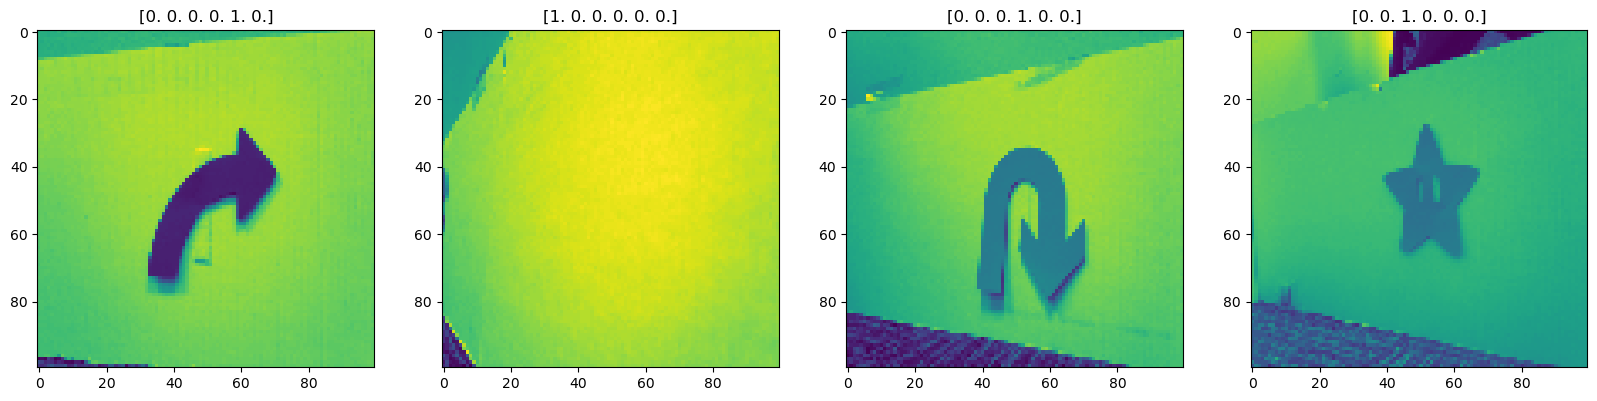

In [60]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.38982743],
          [0.38975686],
          [0.38929412],
          ...,
          [0.5058824 ],
          [0.5058824 ],
          [0.5116314 ]],
 
         [[0.39250195],
          [0.39261958],
          [0.39337254],
          ...,
          [0.5080784 ],
          [0.50980395],
          [0.5171529 ]],
 
         [[0.38862744],
          [0.3970588 ],
          [0.39333335],
          ...,
          [0.50764704],
          [0.51203936],
          [0.5121569 ]],
 
         ...,
 
         [[0.14062749],
          [0.12050989],
          [0.13000004],
          ...,
          [0.25314176],
          [0.3022003 ],
          [0.30565116]],
 
         [[0.10150598],
          [0.11612565],
          [0.10925508],
          ...,
          [0.09313714],
          [0.14348923],
          [0.1520629 ]],
 
         [[0.10302789],
          [0.09359996],
          [0.08301975],
          ...,
          [0.12890206],
          [0.1833886 ],
          [0.15640742]]],
 
 
        [

# 5. Split Data

In [15]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [16]:
train_size

19

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [76]:
Dense??

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(100,100,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
19/19 [==============================] - 3s 48ms/step - loss: 0.5002 - accuracy: 0.3158 - val_loss: 0.4477 - val_accuracy: 0.2500
Epoch 2/20
19/19 [==============================] - 1s 42ms/step - loss: 0.4191 - accuracy: 0.3289 - val_loss: 0.3910 - val_accuracy: 0.4167
Epoch 3/20
19/19 [==============================] - 1s 25ms/step - loss: 0.4030 - accuracy: 0.4737 - val_loss: 0.3366 - val_accuracy: 0.6250
Epoch 4/20
19/19 [==============================] - 1s 25ms/step - loss: 0.3326 - accuracy: 0.5526 - val_loss: 0.2961 - val_accuracy: 0.6667
Epoch 5/20
19/19 [==============================] - 1s 29ms/step - loss: 0.2524 - accuracy: 0.6842 - val_loss: 0.2698 - val_accuracy: 0.6250
Epoch 6/20
19/19 [==============================] - 1s 36ms/step - loss: 0.1864 - accuracy: 0.7632 - val_loss: 0.2027 - val_accuracy: 0.7083
Epoch 7/20
19/19 [==============================] - 1s 29ms/step - loss: 0.1418 - accuracy: 0.8421 - val_loss: 0.1076 - val_accuracy: 0.9167
Epoch 8/20
19

# 8. Plot Performance

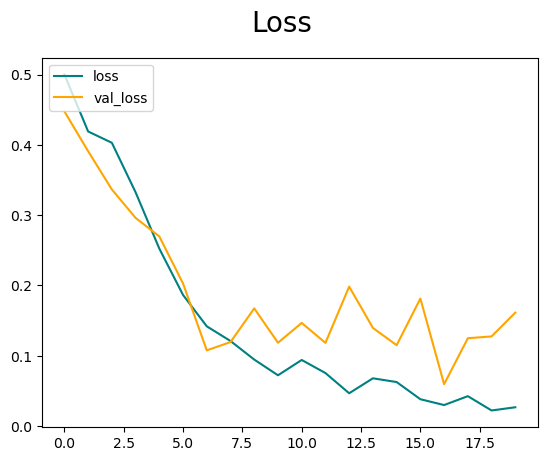

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

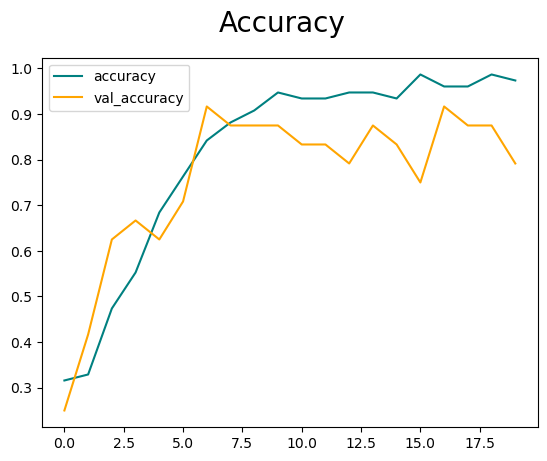

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
#acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    #acc.update_state(y, yhat)

1/1 [==============================] - 0s 31ms/step


In [32]:
print(pre.result(), re.result())#, acc.result())

tf.Tensor(0.8518519, shape=(), dtype=float32) tf.Tensor(0.8214286, shape=(), dtype=float32)


# 10. Test

In [29]:
import cv2

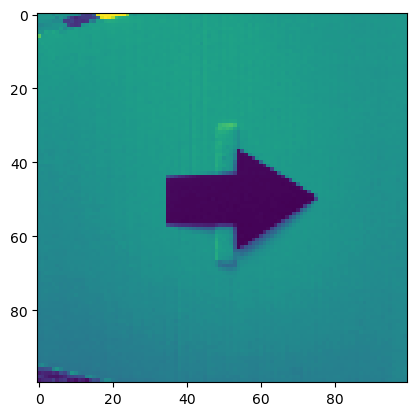

In [111]:
img = cv2.imread('./data_7785/right/78.png')
resize = tf.image.resize(img, (100,100))
resize = cv2.cvtColor(resize.numpy(), cv2.COLOR_BGR2GRAY)
plt.imshow(resize.astype(int))
plt.show()

In [112]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [119]:
def label(yhat):
    if yhat[0][0] > 0.5: 
        print(f'Nothing found')
    elif yhat[0][1] > 0.5:
        print(f'LEFT')
    elif yhat[0][2] > 0.5:
        print(f'PAUSE')
    elif yhat[0][3] > 0.5:
        print(f'REVERSE')
    elif yhat[0][4] > 0.5:
        print(f'RIGHT')
    elif yhat[0][5] > 0.5:
        print(f'STOP')    
    else:
        print(f'Nothing found')

# 11. Save the Model

In [130]:
from tensorflow.keras.models import load_model

In [131]:
model.save(os.path.join('models','imageclassifier.h5'))

In [132]:
new_model = load_model('imageclassifier.h5')

In [121]:
y = new_model.predict(np.expand_dims(resize/255, 0))
label(y)

1/1 [==============================] - 0s 19ms/step
RIGHT
